In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize


In [35]:
df = pd.read_csv('/content/drive/MyDrive/UFC/2021.1/ML/dataset/Star3642_balanced.csv')

In [ ]:
df.head(5)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [ ]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [36]:
sptypes_df = pd.DataFrame(df["SpType"], columns=['SpType'])
labelencoder = LabelEncoder()
sptypes_df['SpType_Cat'] = labelencoder.fit_transform(df['SpType'])

In [37]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(sptypes_df[['SpType_Cat']]).toarray())
df = df.join(enc_df)

In [38]:
X = df.drop(["TargetClass", "SpType"], axis=1)

In [39]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

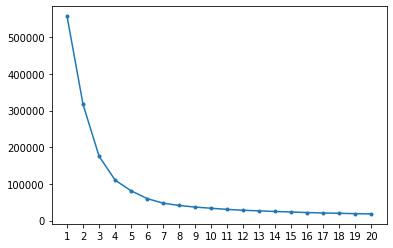

In [ ]:
inertias = []
for k in range(1, 21):
    cluster = KMeans(n_clusters=k, random_state=42)
    cluster.fit(X)
    inertias.append(cluster.inertia_)
x = np.arange(1, 21)
plt.plot(x, inertias, '.-')
plt.xticks(x);

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
pred_y = kmeans.fit_predict(X)

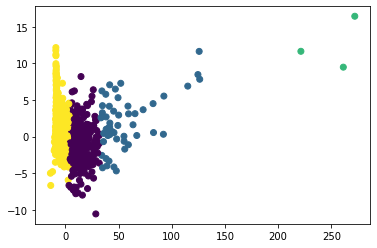

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'], c=pred_y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2']

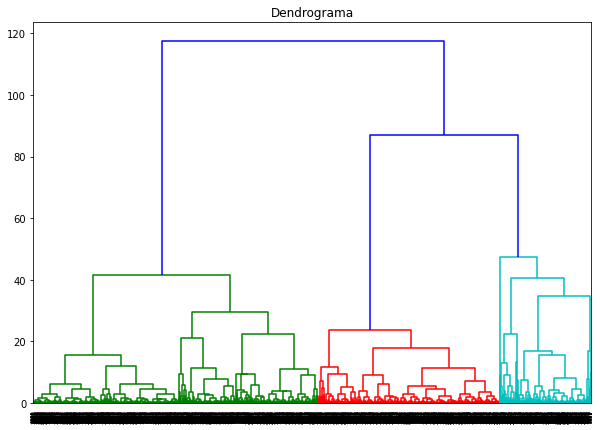

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(X_pca)

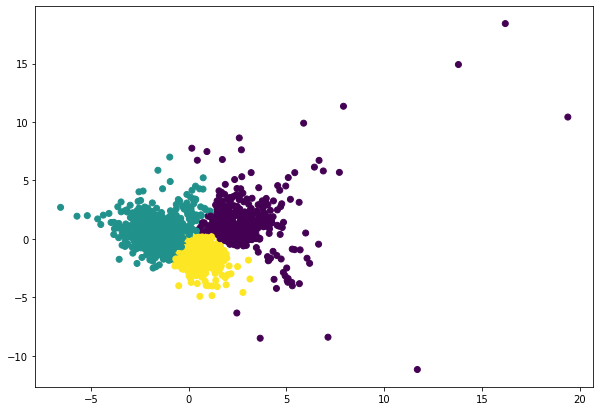

In [ ]:
 plt.figure(figsize=(10, 7))  
 plt.scatter(X_pca['P1'], X_pca['P2'], c=pred) 

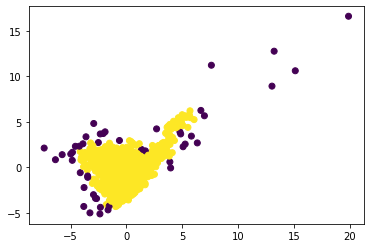

In [58]:
clustering = DBSCAN(eps=0.5, min_samples=4).fit(X_pca)
db_pred = clustering.fit_predict(X_pca)
plt.scatter(X_pca['P1'], X_pca['P2'], c=db_pred) 

In [ ]:
db_pred

array([0, 0, 0, ..., 0, 0, 0])